In [67]:
#correlation

In [68]:
import pandas as pd

In [69]:
data=pd.read_csv('all_data.csv')

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (40,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
data=data.drop(['occupation','invite_id'],axis=1)
data['last_coupon_fee'].replace('\\N','0.0',inplace=True)
data['last_coupon_fee']=data['last_coupon_fee'].astype(float)

data['age']=data['age'].astype(str)


data['age'].replace('nan',np.nan,inplace=True)
data['age'].replace('前',np.nan,inplace=True)
data['age'].replace('0后',np.nan,inplace=True)
data['age']=data['age'].astype(float)
data['login_platform']=data['login_platform'].astype(str)
data['app_version']=data['app_version'].astype(str)
data = pd.get_dummies(data)

In [71]:
data.head()

,user_id,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,total_orders,w1_total_orders,w2_total_orders,...,app_version_3.2.0,app_version_3.2.1,app_version_3.3.0,app_version_3.3.1,app_version_3.4.0,app_version_3.5.0,app_version_3.6.0,app_version_3.7.0,app_version_3.7.1,app_version_nan
0,100002020,0.663138,10,3.0,4.888889,1.0,12.0,16.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,100002033,0.602960,18,7.0,2.941176,1.0,11.0,22.0,8.0,5.0,...,0,0,0,0,0,1,0,0,0,0
2,100002035,0.391684,13,5.0,4.500000,2.0,12.0,13.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,100002036,0.337142,9,5.0,8.625000,1.0,53.0,9.0,2.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,100002040,0.535490,12,5.0,3.454545,1.0,6.0,15.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [72]:
data.columns

Index(['user_id', 'order_sd', 'active_days', 'lastgap', 'avg_gap', 'min_gap',
       'max_gap', 'total_orders', 'w1_total_orders', 'w2_total_orders',
       'w3_total_orders', 'w4_total_orders', 'w5_total_orders',
       'w6_total_orders', 'w7_total_orders', 'total_couponworth',
       'w1_total_couponworth', 'w2_total_couponworth', 'w3_total_couponworth',
       'w4_total_couponworth', 'w5_total_couponworth', 'w6_total_couponworth',
       'w7_total_couponworth', 'label', 'first_order', 'last_order',
       'accountLength', 'distance_min', 'distance_max', 'distance_mean',
       'overall_time_mean', 'update2create_time_mean', 'send2update_time_mean',
       'overall_time_min', 'update2create_time_min', 'send2update_time_min',
       'overall_time_max', 'update2create_time_max', 'send2update_time_max',
       'intime_rate', 'last_coupon_fee', 'last_send_type', 'last_distance',
       'order_nums', 'city_id', 'sex', 'age', 'invite_code',
       'login_platform_Android', 'login_platform_

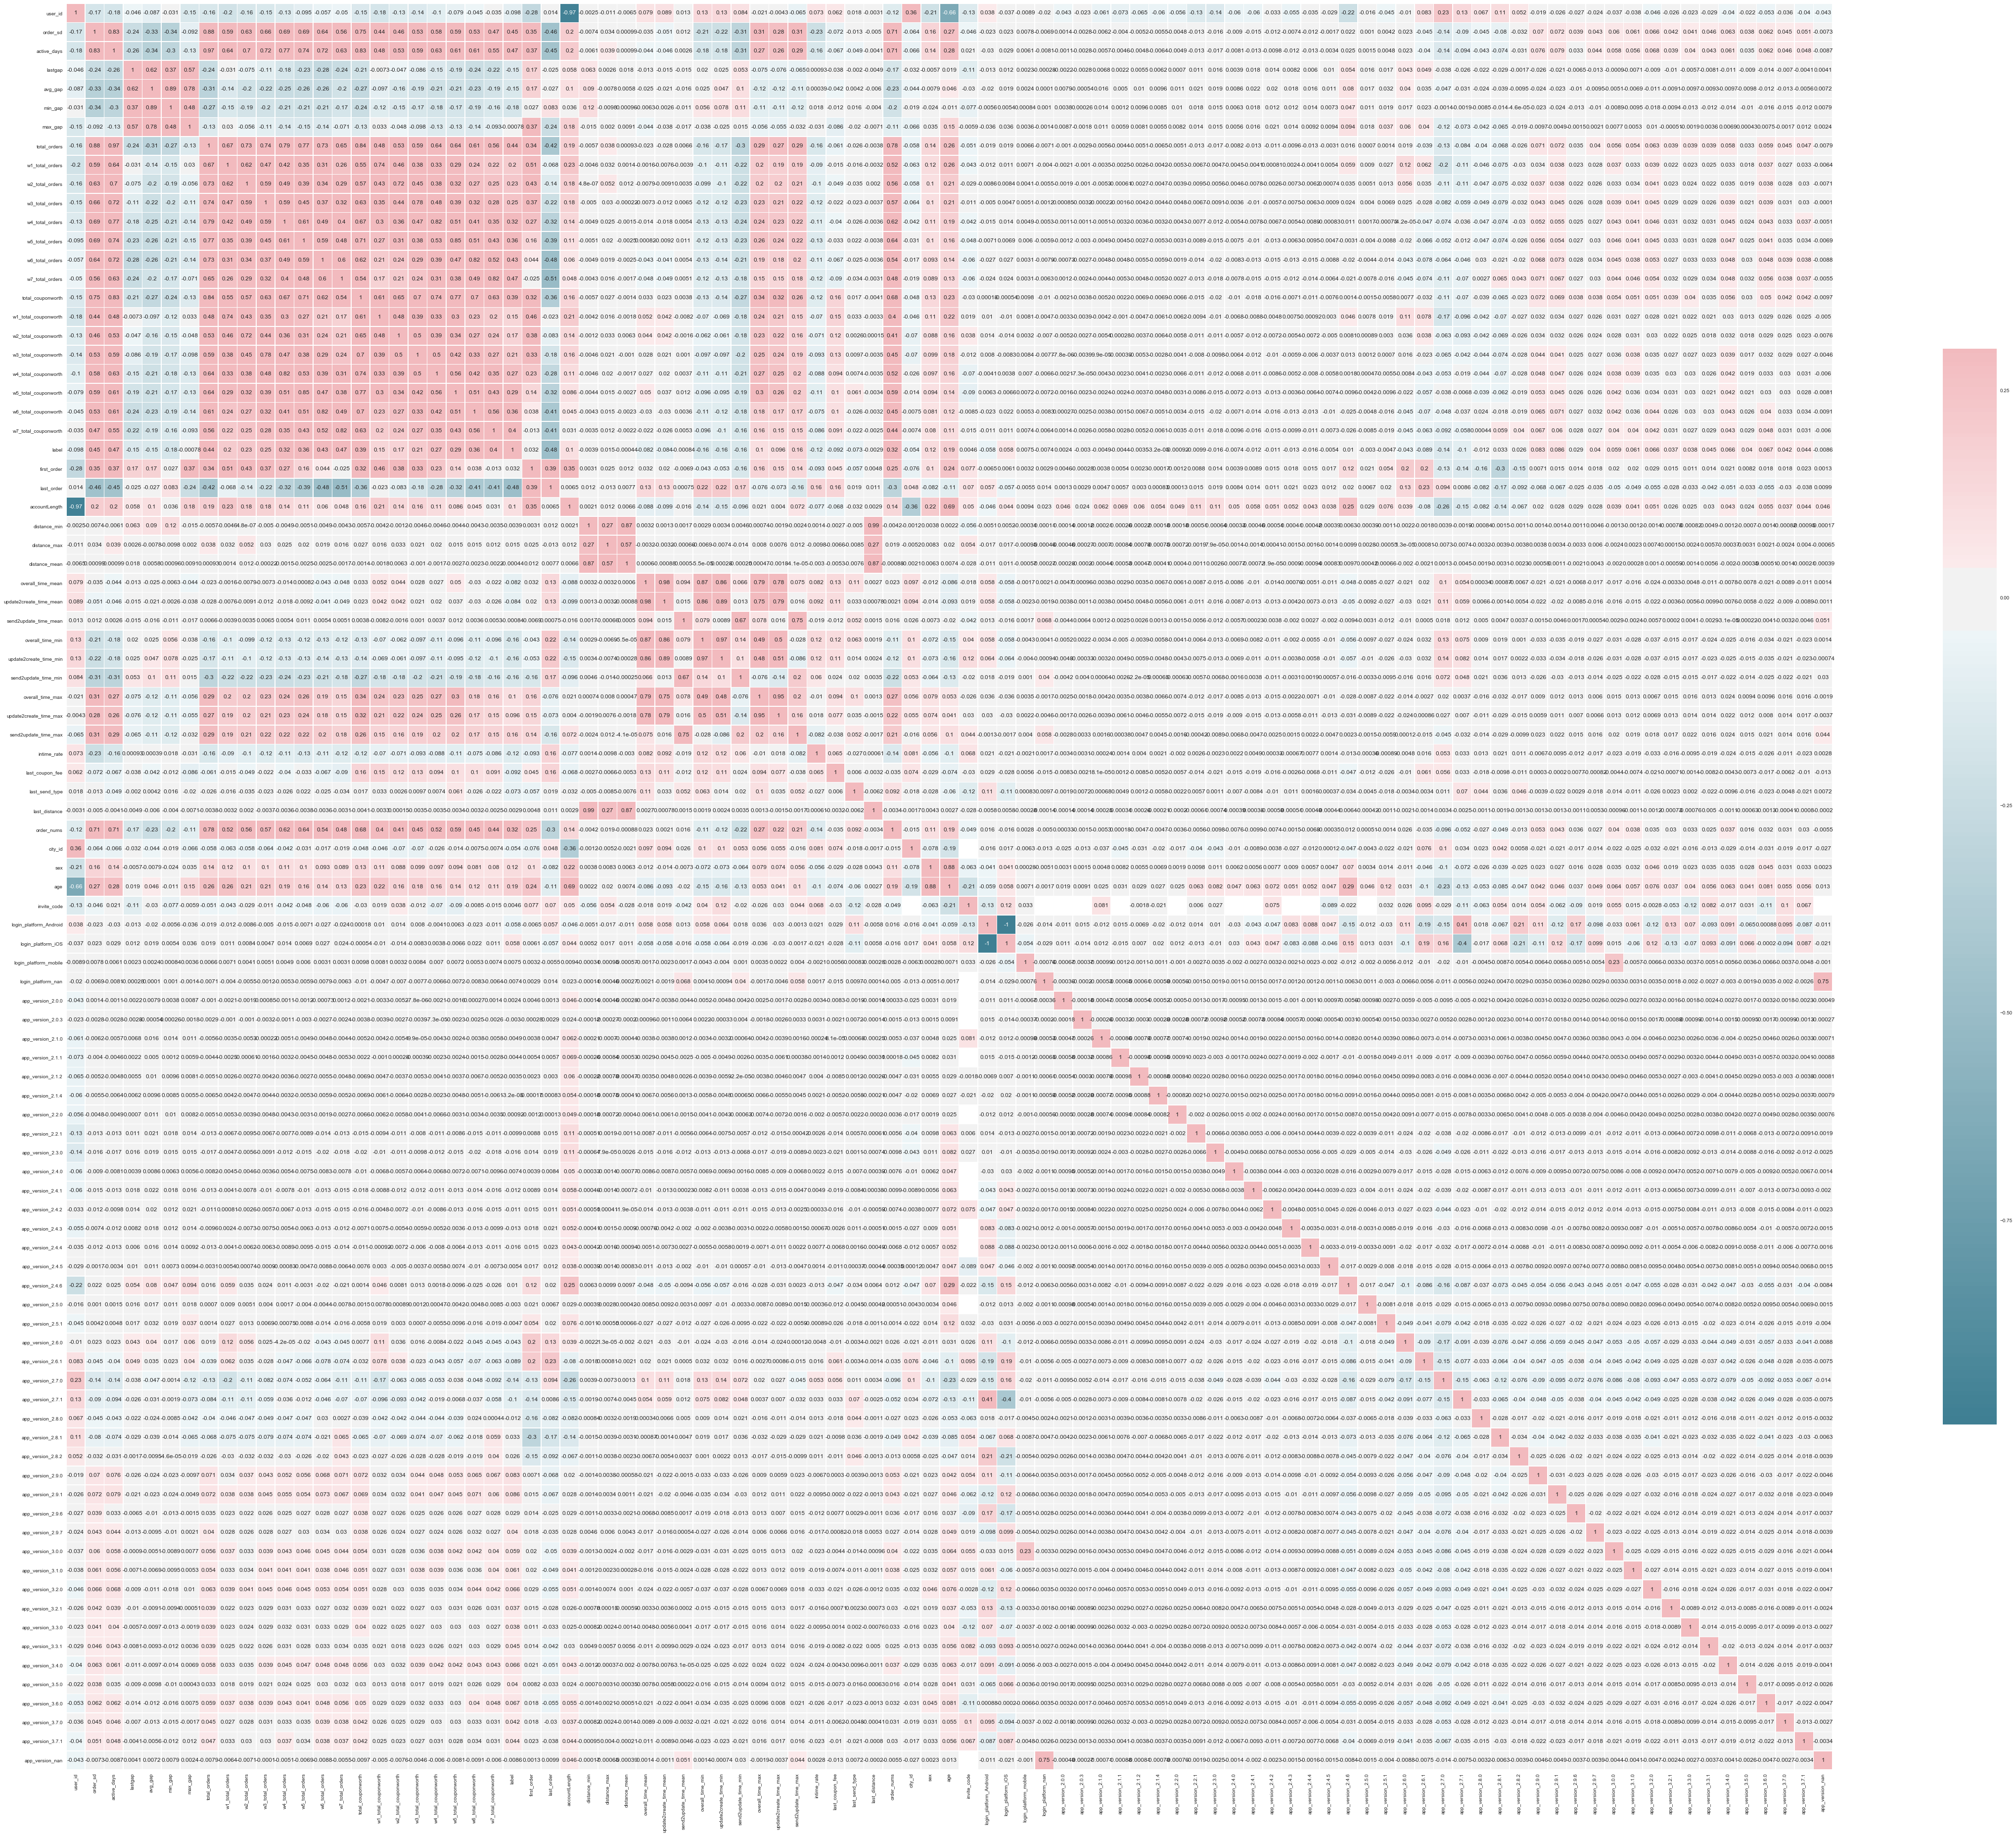

In [73]:
from string import ascii_letters
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")


d = data

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(80, 80))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plot=sns.heatmap(corr, cmap=cmap,annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).get_figure()

plot.savefig("correlation.png")

In [74]:
data.corr().sort_values(by=['label'])['label']

last_order                -0.484395
min_gap                   -0.175691
update2create_time_min    -0.164521
send2update_time_min      -0.163317
overall_time_min          -0.159975
avg_gap                   -0.152229
lastgap                   -0.149733
app_version_2.7.0         -0.141917
intime_rate               -0.116252
app_version_2.7.1         -0.101660
user_id                   -0.098264
last_coupon_fee           -0.091725
app_version_2.6.1         -0.089410
update2create_time_mean   -0.084282
overall_time_mean         -0.081709
last_send_type            -0.073191
login_platform_Android    -0.057965
city_id                   -0.054035
app_version_2.6.0         -0.042509
app_version_2.4.4         -0.016338
app_version_2.3.0         -0.015726
app_version_2.4.3         -0.013062
app_version_2.8.0         -0.012343
app_version_2.4.1         -0.012205
app_version_2.4.2         -0.010724
app_version_2.2.1         -0.009929
app_version_nan           -0.008591
app_version_2.4.0         -0

In [75]:
cor=data.corr()
cor['label']=cor['label'].abs()
cor.sort_values(by=['label'],ascending=False)['label']

label                     1.000000
last_order                0.484395
w7_total_orders           0.472906
active_days               0.472200
order_sd                  0.454651
total_orders              0.442837
w6_total_orders           0.426450
w7_total_couponworth      0.399555
total_couponworth         0.386192
w6_total_couponworth      0.364698
w5_total_orders           0.359762
order_nums                0.321299
w4_total_orders           0.317597
w5_total_couponworth      0.294833
w4_total_couponworth      0.266777
w3_total_orders           0.253228
w2_total_orders           0.225523
w3_total_couponworth      0.210239
w1_total_orders           0.203746
age                       0.187524
min_gap                   0.175691
w2_total_couponworth      0.168360
update2create_time_min    0.164521
send2update_time_min      0.163317
overall_time_min          0.159975
send2update_time_max      0.156739
avg_gap                   0.152229
lastgap                   0.149733
w1_total_couponworth

In [76]:
cor.sort_values(by=['label'],ascending=False)['label'].index

Index(['label', 'last_order', 'w7_total_orders', 'active_days', 'order_sd',
       'total_orders', 'w6_total_orders', 'w7_total_couponworth',
       'total_couponworth', 'w6_total_couponworth', 'w5_total_orders',
       'order_nums', 'w4_total_orders', 'w5_total_couponworth',
       'w4_total_couponworth', 'w3_total_orders', 'w2_total_orders',
       'w3_total_couponworth', 'w1_total_orders', 'age', 'min_gap',
       'w2_total_couponworth', 'update2create_time_min',
       'send2update_time_min', 'overall_time_min', 'send2update_time_max',
       'avg_gap', 'lastgap', 'w1_total_couponworth', 'app_version_2.7.0',
       'intime_rate', 'sex', 'overall_time_max', 'accountLength',
       'app_version_2.7.1', 'user_id', 'update2create_time_max',
       'last_coupon_fee', 'app_version_2.6.1', 'app_version_2.9.1',
       'update2create_time_mean', 'app_version_2.9.0', 'overall_time_mean',
       'last_send_type', 'app_version_3.6.0', 'app_version_3.2.0',
       'app_version_3.4.0', 'app_versi

In [77]:
#delete invite id????

In [79]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

X=data.drop(['label'],axis=1)
X=X.fillna(-1)

y = data['label']

rf= RandomForestClassifier(n_estimators=1500, max_depth=10,random_state=0)
rf.fit(X,y)


feat_importance = rf.tree_.compute_feature_importances(normalize=True)
print("feat importance = " + str(feat_importance))

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [89]:
for name, importance in zip(X.columns, rf.feature_importances_):
    print(name, "=", importance)

user_id = 0.009274392486843076
order_sd = 0.04501472128056834
active_days = 0.0777076833582786
lastgap = 0.04368832628774009
avg_gap = 0.028853191525865032
min_gap = 0.023027228943572713
max_gap = 0.028353529623335216
total_orders = 0.0647959672540523
w1_total_orders = 0.0022105810947042623
w2_total_orders = 0.003622979030517828
w3_total_orders = 0.0036525402468247504
w4_total_orders = 0.007990754565611394
w5_total_orders = 0.019895660295768055
w6_total_orders = 0.050638192832856775
w7_total_orders = 0.14322973028374816
total_couponworth = 0.024057325429908828
w1_total_couponworth = 0.001397949865019579
w2_total_couponworth = 0.0017780075834338007
w3_total_couponworth = 0.002066332969910499
w4_total_couponworth = 0.005379358495330184
w5_total_couponworth = 0.010525227044467365
w6_total_couponworth = 0.02813208487646389
w7_total_couponworth = 0.08804267589551254
first_order = 0.015379968525688327
last_order = 0.16010461578797533
accountLength = 0.007638711911477138
distance_min = 0.0026

In [ ]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('test.png',dpi=10000)
plt.show()

#plt.savefig('test.png', dpi=100)

In [81]:
datatest=pd.read_csv('all_data.csv')
datatest.isnull().any()

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (40,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


user_id                    False
order_sd                   False
active_days                False
lastgap                     True
avg_gap                     True
min_gap                     True
max_gap                     True
total_orders               False
w1_total_orders            False
w2_total_orders            False
w3_total_orders            False
w4_total_orders            False
w5_total_orders            False
w6_total_orders            False
w7_total_orders            False
total_couponworth          False
w1_total_couponworth       False
w2_total_couponworth       False
w3_total_couponworth       False
w4_total_couponworth       False
w5_total_couponworth       False
w6_total_couponworth       False
w7_total_couponworth       False
label                      False
first_order                False
last_order                 False
accountLength              False
distance_min                True
distance_max                True
distance_mean               True
overall_ti

In [82]:
datatest[pd.isnull(datatest['order_nums'])]

,user_id,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,total_orders,w1_total_orders,w2_total_orders,...,last_distance,order_nums,city_id,sex,age,occupation,invite_id,invite_code,login_platform,app_version
191864,101427199,0.119523,1,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,1048.0,NaN,310100,0,0,NaN,0,NaN,iOS,3.0.0


In [83]:
len(datatest)

191865